In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [23]:
# Gerando dados com ruído
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando um modelo KNN com k=1 (propenso a overfitting)
knn_overfit = KNeighborsClassifier(n_neighbors=5)  # K=1 indica que o modelo se ajustará ao ruído
knn_overfit.fit(X_train, y_train)

# Fazendo previsões no treino e teste
train_pred = knn_overfit.predict(X_train)
test_pred = knn_overfit.predict(X_test)

In [24]:
print(train_pred,test_pred)

[1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0
 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0] [1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0
 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1]


In [25]:
# Calculando as acurácias
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

In [26]:
print(train_accuracy,test_accuracy)

0.9142857142857143 0.9222222222222223


In [27]:
# Plotando a fronteira de decisão
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')

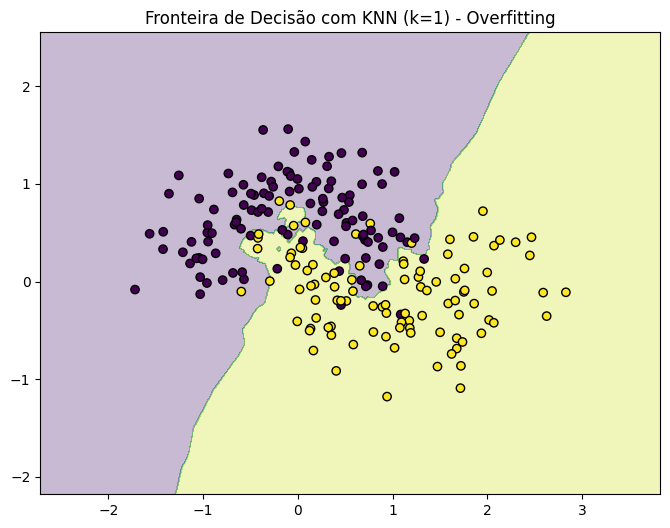

In [28]:
# Visualizando o overfitting
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_decision_boundary(knn_overfit, X_train, y_train, ax)
ax.set_title("Fronteira de Decisão com KNN (k=1) - Overfitting")
plt.show()

In [29]:
# Exibindo os resultados de acurácia
train_accuracy, test_accuracy

(0.9142857142857143, 0.9222222222222223)